<a href="https://colab.research.google.com/github/Said-Abdullahi/SIT742-Modern-Data-Science-Web-Log-Analytics-Citation-Prediction/blob/main/SAID_ABDULLAHI_SIT742Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 16/04/2022 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Said Abdullahi
- Student ID:  221377847
- Email:  sabdullahi@deakin.edu.au
- Lab Session and Tutor (for on campus students):

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import glob
import zipfile
import os

 <div class="alert alert-block alert-info">

**Code**:
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [ ]:
import os

# Create a folder in the current directory called data

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
# name of the folder
createFolder('./data/')

In [ ]:
# Zipfile Module
from zipfile import ZipFile

# Open and List and Read the properties of a ZIP archive
zipFile='/content/HTWebLog_p1.zip'
all_files =ZipFile(zipFile, 'r')
file_names = all_files.namelist()

# Extract ZIP file contents

with zipfile.ZipFile(zipFile,"r") as zip_ref:
    zip_ref.extractall('/content/data')


# Ensure that the file is closed
zip_ref.close()

In [ ]:
# Get the number files in zip the folder

file_counts=0
for file in file_names:
  file_counts=file_counts+1
print("The number of files in the directory = "+str(file_counts))

The number of files in the directory = 120


In [ ]:
# get the directory path
relative_path='./data/'
path =os.path.join(os.getcwd(),relative_path)
print(path)

/content/./data/


In [ ]:
# Creating your header
header_list = ["date", "time", "s-sitename", "s-ip", "cs-method", "cs-uri-stem", "cs-uri-query", "s-port", "cs-username", "c-ip", "cs(User-Agent)", "cs(Referer)", "sc-status", "sc-substatus", "sc-win32-status"]
# Creating your mising values data
missing_values = ('na', 'NaN', '-')

#creating an empty list to capture our read data
li=[]
# Reading  Comma Separate Values files with Panda and creating a dataFrame
for file in file_names:
    df = pd.read_csv(path+file, encoding='latin1',names=header_list, na_values=missing_values, index_col=False, delim_whitespace=True,skiprows=4)
    df.drop(index=[0, 4],inplace=True)
    li.append(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Concatenate files into a data frame
df_ht = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
#check there is no bad headers
bad_data=['#Fields:','#Software:','#Version:',"#Date:"]

for bad_item in bad_data:
  print(df_ht[df_ht['date']==bad_item])

             date  time s-sitename  ...    sc-status sc-substatus sc-win32-status
9885     #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
1016261  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
1302836  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
2196003  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
2372899  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
2443857  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
2444094  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
3516777  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
3908623  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
5994604  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
7887804  #Fields:  date       time  ...  cs(Referer)    sc-status    sc-substatus
8056856  #Fields

In [ ]:
#Get all the index of bad headers in order to delete it later

index_names1 = df_ht[ df_ht['date'] == '#Fields:' ].index
index_names2 = df_ht[ df_ht['date'] == '#Software:' ].index
index_names3 = df_ht[ df_ht['date'] == '#Version:' ].index
index_names4 = df_ht[ df_ht['date'] == '#Date:' ].index

In [ ]:
# drop these row indexes
# from dataFrame
df_ht.drop(index_names1, inplace = True)
df_ht.drop(index_names2, inplace = True)
df_ht.drop(index_names3, inplace = True)
df_ht.drop(index_names4, inplace = True)

In [ ]:
#bad=['#Fields:','#Software:','#Version:','#Date:']
#check there is no duplicates headers
df_ht[df_ht['date']=='#Fields:']
df_ht[df_ht['date']== '#Software:']
df_ht[df_ht['date']=='#Version:']
df_ht[df_ht['date']=='#Date:']

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status


In [ ]:
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
2,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_reservation...,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


 <div class="alert alert-block alert-info">

**Code**:
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [ ]:
# Display all columns and their data types
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438688 entries, 0 to 8438735
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   date             object
 1   time             object
 2   s-sitename       object
 3   s-ip             object
 4   cs-method        object
 5   cs-uri-stem      object
 6   cs-uri-query     object
 7   s-port           object
 8   cs-username      object
 9   c-ip             object
 10  cs(User-Agent)   object
 11  cs(Referer)      object
 12  sc-status        object
 13  sc-substatus     object
 14  sc-win32-status  object
dtypes: object(15)
memory usage: 1.0+ GB


In [ ]:
# Show basic statistics
df_ht.describe(include=np.object)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
count,8438688,8438688,8438688,8438688,8438688,8438688,552368,8438688,0,8438688,8435161,7129821,8438688,8438688,8438688
unique,121,86372,1,1,6,4761,1987,2,0,74546,4958,39708,23,7,25
top,2006-12-12,08:37:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
freq,120188,382,8438688,8438688,8421749,402975,231254,7934235,NaN,93765,1982198,1618614,5719922,7933580,7575584


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**:
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br>
    3. Remove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [ ]:
# Check all NAs from data

df_ht_missing = df_ht.isna()
df_ht_missing.sum()

date                     0
time                     0
s-sitename               0
s-ip                     0
cs-method                0
cs-uri-stem              0
cs-uri-query       7886320
s-port                   0
cs-username        8438688
c-ip                     0
cs(User-Agent)        3527
cs(Referer)        1308867
sc-status                0
sc-substatus             0
sc-win32-status          0
dtype: int64

In [ ]:
# delete columns with NA more than 15% which cs-uri-query, cs-username, cs(Referer)

del df_ht['cs-uri-query']
del df_ht['cs-username']
del df_ht['cs(Referer)']


In [ ]:
#Check if columns are deleted
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_reservation...,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [ ]:
# Delete all rows with NA
df_ht = df_ht.dropna()

#Check if NA deleted

df_ht_missing_deleted = df_ht.isna()
df_ht_missing_deleted.sum()

date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64

In [ ]:
#Check if columns are deleted
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_reservation...,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [ ]:
# Find the frequencies of c - ip

cs_ur_stem_freq = df_ht['cs-uri-stem'].value_counts()
cs_ur_stem_freq

/Tulip/common/common_style.aspx                    402922
/Tulip/includes/js/CommonUtil.js                   127679
/Tulip/common/images/top_bar.jpg                   125743
/Tulip/common/images/spacer.gif                    105470
/Tulip/common/images/bar_1.gif                     100626
                                                    ...  
/Tulip/common/zh-hk=))/images/sidebanner_11.jpg         1
/Tulip/home_index.aspx                                  1
/Tulip/aboutus                                          1
/s8shell.asp                                            1
/includes/footer.php                                    1
Name: cs-uri-stem, Length: 4687, dtype: int64

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**:
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot



In [ ]:
# Change date and time data type

df_ht['date']=pd.to_datetime( df_ht['date'])
df_ht['time']=pd.to_datetime( df_ht['time'])

# Check data types

df_ht.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date               datetime64[ns]
time               datetime64[ns]
s-sitename                 object
s-ip                       object
cs-method                  object
cs-uri-stem                object
s-port                     object
c-ip                       object
cs(User-Agent)             object
sc-status                  object
sc-substatus               object
sc-win32-status            object
dtype: object

In [ ]:
#Make the frequency to hour for the column time
hour=df_ht["time"].dt.hour
hour

#Group data by hour
df_group=df_ht.groupby([hour])
df_group

In [ ]:
#Check that it is group from 0  - 23
df_group.groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 1: [1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1

In [ ]:
# Count and group
Time_value = df_group.size()
Time_value

time
0     155679
1     344334
2     432290
3     546655
4     529352
5     487330
6     544734
7     522365
8     550744
9     553564
10    443519
11    368948
12    367635
13    442429
14    493695
15    473057
16    387291
17    250285
18    159546
19     93829
20     72559
21     66474
22     65218
23     83629
dtype: int64

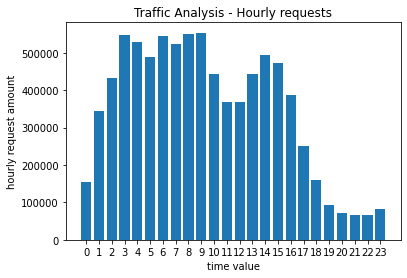

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot bar chart of hourly request
data = Time_value
# The index of Time_value is the x-axis
labels = Time_value.index
plt.xticks(range(len(data)), labels)
plt.xlabel('time value')
plt.ylabel('hourly request amount')
plt.title('Traffic Analysis - Hourly requests')
plt.bar(range(len(data)), data)
plt.show()
plt.savefig('line_plot.pdf')


<div class="alert alert-block alert-warning">

**Code**:
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [ ]:
#Filter the hourly requests by removing any below 490,000 and above 400,000.
Filter_request1 = 400000
Filter_request2 = 490000

#Filter the hourly requests by removing any above 400000
hourly_request_amount1 = Time_value[Time_value >= Filter_request1]
#Filter the hourly requests by removing any below 490000
hourly_request_amount2  = hourly_request_amount1[hourly_request_amount1 <= Filter_request2]

#Get the hourly request amount (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)
hourly_request_amount2

time
2     432290
5     487330
10    443519
13    442429
15    473057
dtype: int64

### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**:
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

In [ ]:
#Check unique values for sc-status
df_ht['sc-status'].unique()

#As you can see we have unique values that are the same
#Because data types are different. (e.g. '200', and 200)

array(['200', '304', '206', '404', '301', '302', '500', '501', 304, 200,
       206, 404, 302, 500, 501, 301, 400, 403, 406, '400', '403', 416,
       '406'], dtype=object)

In [ ]:
#Change sc-status data type to numbers [integer]

df_ht['sc-status'] = df_ht['sc-status'].astype(int)

#Check data types
df_ht.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


date               datetime64[ns]
time               datetime64[ns]
s-sitename                 object
s-ip                       object
cs-method                  object
cs-uri-stem                object
s-port                     object
c-ip                       object
cs(User-Agent)             object
sc-status                   int64
sc-substatus               object
sc-win32-status            object
dtype: object

In [ ]:
# Find the frequencies of sc-status

sc_status_freq = df_ht['sc-status'].value_counts()
sc_status_freq

200    6072354
304    2136876
404     142571
206      72471
302       7366
500       2010
403        700
301        433
400        210
501        113
406         54
416          3
Name: sc-status, dtype: int64

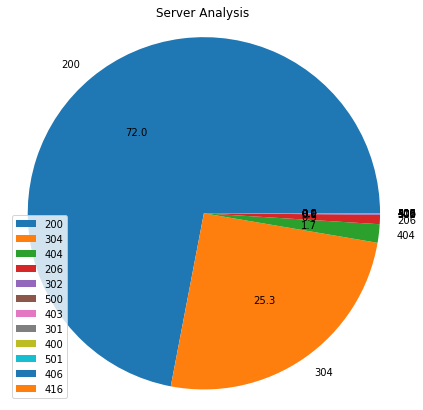

In [ ]:
# Creating pie chart for sc-status
labels = sc_status_freq.index
# frequency count
sc_status_freq = df_ht['sc-status'].value_counts()
# colors
colors = ['blue','yellow','red','green','gold','lightskyblue', 'slateblue', 'white', 'black', 'teal', 'indigo', 'maroon' ]
fig, ax = plt.subplots(figsize = (7, 7))
ax.pie(sc_status_freq, labels = labels, autopct = "%1.1f");
plt.title('Server Analysis')
plt.axis('equal')
plt.legend(labels,loc=3)
plt.show()

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**:
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [ ]:
!pip install ip2geotools

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 112kB 10.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 829kB 15.0MB/s 
     |████████████████████████████████| 286kB 29.6MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 911kB 37.3MB/s 
     |████████████████████████████████| 747kB 46.3MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 235kB 43.4MB/s 
     |████████████████████████████████| 348kB 41.2MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 1.3MB 37.8MB/s 
     |████████████████████████████████| 143kB 54.2MB/s 
     |████████████████████████████████| 296kB 43.6MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 42.9MB/s 
  Cre

In [ ]:
#Filter for 01 Jan 2007 from 20:00:00 pm to 20:59:59
time_filter1 = '20:00:00'
time_filter2 = '20:59:59'
jan_filter='2007-01-01'

#Filter for 01 Jan 2007
df_jan=df_ht[df_ht['date']==jan_filter]

#Filter for 20:00:00 pm to 20:59:59
df_time = df_jan[df_jan['time']>= time_filter1]
df2007 = df_time[df_time['time'] <= time_filter2]

#Check dataframe df2007
df2007

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
4770345,2007-01-01,2021-04-15 20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4770346,2007-01-01,2021-04-15 20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4770347,2007-01-01,2021-04-15 20:01:12,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200,0,0
4770348,2007-01-01,2021-04-15 20:01:48,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200,0,0
4770349,2007-01-01,2021-04-15 20:01:57,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4770554,2007-01-01,2021-04-15 20:52:46,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.85.161,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404,0,2
4770555,2007-01-01,2021-04-15 20:52:48,W3SVC1,127.0.0.1,GET,/Tulip/dining/zh-hk/dining_cafeserena.aspx,80,74.6.85.206,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,200,0,0
4770556,2007-01-01,2021-04-15 20:59:04,W3SVC1,127.0.0.1,GET,/Tulip/whatsnew/whatsnew_roomsdetail.aspx,80,202.160.178.181,Mozilla/5.0+(compatible;+Yahoo!+Slurp+China;+h...,200,0,0
4770557,2007-01-01,2021-04-15 20:59:40,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.75.47,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404,0,2


In [ ]:
#All ip addresses for 1/1/2007 from 8 pm to 8.59 pm
all_ips=df2007['c-ip']
all_ips

4770345      210.184.71.81
4770346      210.184.71.81
4770347     62.211.200.146
4770348     62.211.200.146
4770349     62.211.200.146
                ...       
4770554        74.6.85.161
4770555        74.6.85.206
4770556    202.160.178.181
4770557         74.6.75.47
4770558         74.6.73.79
Name: c-ip, Length: 214, dtype: object

In [ ]:
#Function for finding IP addresses request by country
from ip2geotools.databases.noncommercial import DbIpCity
def getip_country(query_ip):
  #query_ip =df_jan['c-ip']
  df2007['Country'] = df2007.apply(lambda row: DbIpCity.get(row['c-ip'],
  api_key='free').country, axis=1)

  return df2007['Country']

In [ ]:
# Ip address request by countries
Countries = getip_country(all_ips)

#Frequency of request by countries
Countries.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


HK    169
CN     25
US     16
IT      3
AU      1
Name: Country, dtype: int64

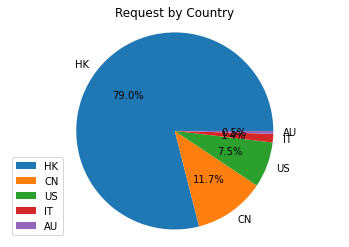

In [ ]:
#Plot request countries in pie chart
my_data = Countries.value_counts()
my_labels = Countries.value_counts().index

plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Request by Country')
plt.axis('equal')
plt.legend(my_labels,loc=3)
plt.show()

In [ ]:
#List top 3 countries request numbers

Countries.value_counts().nlargest(3)

HK    169
CN     25
US     16
Name: Country, dtype: int64

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**:
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

In [ ]:
#Function for finding ip addresses city
from ip2geotools.databases.noncommercial import DbIpCity
def getip_city(query_ip):
  #query_ip =df_jan['c-ip']
  df2007['City'] = df2007.apply(lambda row: DbIpCity.get(row['c-ip'],
  api_key='free').city, axis=1)

  return df2007['City']


In [ ]:
#Request from city level
Cities = getip_city(all_ips)

#Frequency of cities request numbers
Cities.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
Hangzhou                                1
Quarry Bay                              1
Sydney                                  1
San Francisco (Financial District)      1
Mountain View                           1
Name: City, dtype: int64

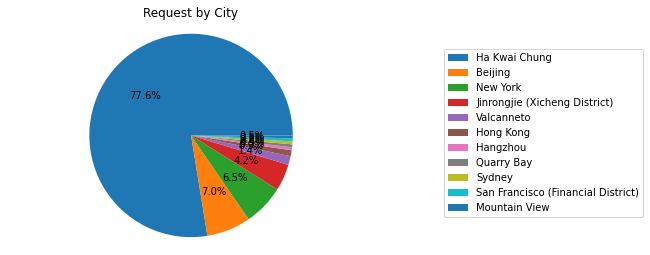

In [ ]:
# Create a pie chart of the city values

my_data_city = Cities.value_counts()
my_labels_city = Cities.value_counts().index

plt.pie(my_data_city,autopct='%1.1f%%')
plt.title('Request by City')
plt.axis('equal')
plt.legend(my_labels_city, bbox_to_anchor=(1,0.5), loc="center left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.show()

In [ ]:
#List top 3 cities request values

Cities.value_counts().nlargest(3)

Ha Kwai Chung    166
Beijing           15
New York          14
Name: City, dtype: int64

# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library.

<div class="alert alert-block alert-warning">

**Code**:
    Import and install your web crawling library here.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [ ]:
!pip install BeautifulSoup

In [ ]:
# write your import and necessary web crawling libary here
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML
import re

### 3.2 Find all professors in School of IT and save it as csv.

<div class="alert alert-block alert-warning">

**Code**:
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [ ]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

In [ ]:
#Get the BeautifulSoup object for the web url that you want to scrape
url = 'https://www.deakin.edu.au/information-technology/staff-listing'
r = urllib.request.urlopen(url).read()
soup = BeautifulSoup(r, 'lxml')
type(soup)

bs4.BeautifulSoup

In [ ]:
# We are scrapping the url and extracting all the information into a list
# We also going to split and text only
li=[]
for link in soup.findAll('a', attrs={'href': re.compile("^http")}):

        a=link.text.split(">")
        li.append(a)

In [ ]:
# All the information scraped from url which includes professors
li

[['School of Information Technology'],
 ['Staff listing'],
 ['Research'],
 ['Software Engineering and Innovation Research Centre'],
 ['Data to Intelligence Research Centre'],
 ['Centre for Internet of Things ECOsystems Research and Experimentation '],
 ['Our partners'],
 ['Facilities'],
 ['DISCovery Lab'],
 ['RIoT Lab'],
 ['Student capstone program'],
 ['Professor John Yearwood'],
 ['Georgia Loupis'],
 ['Professor Jean-Guy Schneider'],
 ['Associate Professor Andrew Cain'],
 ['Associate Professor Richard Dazeley'],
 ['Associate Professor Mohamed Abdelrazek'],
 ['Professor Peter Eklund'],
 ['Associate Professor Xiao Liu'],
 ['Associate Professor Tim Wilkin'],
 ['Dr Michael Hobbs'],
 ['Mr Damien Manuel'],
 ['Professor Robin Doss'],
 ['Emeritus Professor Lynn Batten'],
 ['Emeritus Professor Andrzej Goscinski'],
 ['Professor Jemal Abawajy'],
 ['Professor Maia Angelova'],
 ['Professor Gleb Beliakov'],
 ['Professor Terry Caelli'],
 ['Professor Jinho Choi'],
 ['Professor Robin Doss'],
 ['Profe

In [ ]:
#filter the list and extract all professors (emeritus, professors, and associate)
professorlist=li[23:47]

In [ ]:
# The list of all the professors
professorlist

[['Emeritus Professor Lynn Batten'],
 ['Emeritus Professor Andrzej Goscinski'],
 ['Professor Jemal Abawajy'],
 ['Professor Maia Angelova'],
 ['Professor Gleb Beliakov'],
 ['Professor Terry Caelli'],
 ['Professor Jinho Choi'],
 ['Professor Robin Doss'],
 ['Professor Peter Eklund'],
 ['Professor Seng Loke'],
 ['Professor Antonio Robles-Kelly'],
 ['Professor Jean-Guy Schneider'],
 ['Professor Yong Xiang'],
 ['Professor John Yearwood'],
 ['Professor Arkady Zaslavsky'],
 ['Associate Professor Mohamed Abdelrazek'],
 ['Associate Professor Andrew Cain'],
 ['Associate Professor Richard Dazeley'],
 ['Associate Professor Guangyan Huang'],
 ['Associate Professor Gang Li'],
 ['Associate Professor Jianxin Li'],
 ['Associate Professor Xiao Liu'],
 ['Associate Professor Vicky Mak'],
 ['Associate Professor Tim Wilkin']]

In [ ]:
# We parse the professor using the given function above name and title. We will switch. Name of professor will be first and title second.

my_list=[]
for list in professorlist:
    for number in list:
        n2=parse_name(number)
        #print(n2)
        my_list.append(n2)

In [ ]:
#Check if it is correct. The Name is first and title is second
my_list

[('Lynn Batten', 'Emeritus Professor'),
 ('Andrzej Goscinski', 'Emeritus Professor'),
 ('Jemal Abawajy', 'Professor'),
 ('Maia Angelova', 'Professor'),
 ('Gleb Beliakov', 'Professor'),
 ('Terry Caelli', 'Professor'),
 ('Jinho Choi', 'Professor'),
 ('Robin Doss', 'Professor'),
 ('Peter Eklund', 'Professor'),
 ('Seng Loke', 'Professor'),
 ('Antonio Robles-Kelly', 'Professor'),
 ('Jean-Guy Schneider', 'Professor'),
 ('Yong Xiang', 'Professor'),
 ('John Yearwood', 'Professor'),
 ('Arkady Zaslavsky', 'Professor'),
 ('Mohamed Abdelrazek', 'Associate Professor'),
 ('Andrew Cain', 'Associate Professor'),
 ('Richard Dazeley', 'Associate Professor'),
 ('Guangyan Huang', 'Associate Professor'),
 ('Gang Li', 'Associate Professor'),
 ('Jianxin Li', 'Associate Professor'),
 ('Xiao Liu', 'Associate Professor'),
 ('Vicky Mak', 'Associate Professor'),
 ('Tim Wilkin', 'Associate Professor')]

In [ ]:
# All professor are from Deakin University
my_list2=[]

for item in my_list:
    uni="Deakin University"
    my_list2.append(uni)

In [ ]:
# A list of Deakin University that match the professors name and title
my_list2

['Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University']

In [ ]:
import pandas as pd
# import the list of professor names and university into a dataframe
df_proflist=pd.DataFrame((my_list),columns=['name','title'])
df_unilist=pd.DataFrame((my_list2),columns=['university'])

In [ ]:
 # Place the DataFrames side by side
df_prof_namelist = pd.concat([df_proflist, df_unilist], axis=1)
df_prof_namelist

,name,title,university
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University
5,Terry Caelli,Professor,Deakin University
6,Jinho Choi,Professor,Deakin University
7,Robin Doss,Professor,Deakin University
8,Peter Eklund,Professor,Deakin University
9,Seng Loke,Professor,Deakin University


In [ ]:
df_prof_namelist.to_csv(r"/content/Professor-list.csv", index=False, header=True)

## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors

<div class="alert alert-block alert-warning">

**Code**:
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [ ]:
#All the professor google scholar url that we want to scrape
google_pages=['https://scholar.google.com.au/citations?hl=en&user=Tmg0T9sAAAAJ','https://scholar.google.com.au/citations?hl=en&user=CCF7GZoAAAAJ',
       'https://scholar.google.com.au/citations?hl=en&user=_plRpWEAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=E9ZX2lgAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=QzFia5YAAAAJ',
       'https://scholar.google.com.au/citations?hl=en&user=nzLXktMAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=oE1fk_gAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=ZbdN-0AAAAAJ',
       'https://scholar.google.com.au/citations?hl=en&user=y5249-IAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=7ZrNsYEAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=W5VJ07UAAAAJ',
       'https://scholar.google.com.au/citations?hl=en&user=h4HjI2UAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=sTAoZeUAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=ybnQkasAAAAJ',
       'https://scholar.google.com.au/citations?hl=en&user=Re6GgdcAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=Tp8Sx6AAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=zeAIa-8AAAAJ',
       'https://scholar.google.com/citations?user=dqwjm-0AAAAJ&hl=en', 'https://scholar.google.com.au/citations?hl=en&user=WenZ4JUAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=HMEuyCAAAAAJ',
       'https://scholar.google.com.au/citations?hl=en&user=KAiJydoAAAAJ', 'https://scholar.google.com.au/citations?hl=en&user=leo8TPYAAAAJ'


]



In [ ]:
# Scrape google scholar for all the citations needed

#Create a list for all the variables
name = []
citation_all=[]
h_index_all=[]
i10_index_all=[]
i10_index_since_2016=[]
h_index_since_2016=[]
citations_since_2016=[]

#Create a loop to go scrape through google_pages which is our list of urls
#After scrape it wil put in the list
for google_page in google_pages:
  r = requests.get(google_page)
  soup = BeautifulSoup(r.content, 'lxml')
  div_name = soup.find_all("div", id='gsc_prf_in')
  prof_name=div_name[0].text
  name.append(prof_name)
  all_div_citation = soup.find_all("td", class_='gsc_rsb_std')
  citation=all_div_citation[0].text
  citation_all.append(citation)
  h_index=all_div_citation[2].text
  h_index_all.append(h_index)
  i10_index=all_div_citation[4].text
  i10_index_all.append(i10_index)
  h_index2016=all_div_citation[3].text
  h_index_since_2016.append(h_index2016)
  i10_index2016=all_div_citation[5].text
  i10_index_since_2016.append(i10_index2016)
  citations2016=all_div_citation[1].text
  citations_since_2016.append(citations2016)

#put the scraped lists into a dataframe
google_sholar = pd.DataFrame(
    {
        "Name": name,
        "Citations_all": citation_all,
        "H_index_all": h_index_all,
         "H_index_since_2016": h_index_since_2016,
        "I10_index_all": i10_index_all,
         "I10_index_since_2016": i10_index_since_2016,
        "Citations_since_2016": citations_since_2016

    }
)

#Note I just remembered that I could have scrape the title too. Found out to late

In [ ]:
# Create dictionary for missing professor Andrzej Goscinski
missing_prof1 = {
        "Name": "Andrzej Goscinski",
        "Citations_all": ["NA"],
        "H_index_all": ["NA"],
         "H_index_since_2016": ["NA"],
        "I10_index_all": ["NA"],
         "I10_index_since_2016": ["NA"],
        "Citations_since_2016": ["NA"]


}

In [ ]:
# Create dictionary for missing professor Jemal Abawajy
missing_prof2 = {
        "Name": "Jemal Abawajy",
        "Citations_all": ["NA"],
        "H_index_all": ["NA"],
         "H_index_since_2016": ["NA"],
        "I10_index_all": ["NA"],
         "I10_index_since_2016": ["NA"],
        "Citations_since_2016": ["NA"]

}

In [ ]:
# Create dictionary for missing professor Robin Doss
missing_prof3 = {
        "Name": "Robin Doss",
        "Citations_all": ["NA"],
        "H_index_all": ["NA"],
         "H_index_since_2016": ["NA"],
        "I10_index_all": ["NA"],
         "I10_index_since_2016": ["NA"],
        "Citations_since_2016": ["NA"]

}

In [ ]:
#Put all the missing professor dictionaries into a dataframe
prof_missing = pd.DataFrame(missing_prof1)
prof_missing2 = pd.DataFrame(missing_prof2)
prof_missing3 = pd.DataFrame(missing_prof3)

In [ ]:
# Adding professors with no google scholar profile to the dataframe
google_sholar_missing = google_sholar.append(prof_missing, ignore_index=False)
google_sholar_missing1 = google_sholar_missing.append(prof_missing2, ignore_index=False)
google_sholar_missing2 = google_sholar_missing1.append(prof_missing3, ignore_index=False)

In [ ]:
# reset index for dataframe
google_scholar_miss_included = google_sholar_missing2.reset_index(drop=True)
google_scholar_miss_included

,Name,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
0,Lynn Batten,2528,23,16,45,21,1172
1,Maia Angelova,680,15,11,21,14,397
2,Gleb Beliakov,8173,42,32,135,86,4632
3,Terry Caelli,8662,51,20,176,36,1472
4,Jinho Choi,7814,37,29,167,95,5023
5,Chang-Tsun Li,4341,33,21,104,65,2336
6,Peter Werner Eklund,3962,34,14,72,23,778
7,Seng W. Loke,7179,38,21,126,50,2907
8,Antonio Robles-Kelly,3655,24,15,62,27,1534
9,Jean-Guy Schneider,1812,24,15,48,21,643


In [ ]:
# Chang-Tsun Li is not include in the previous list so we delete it
google_scholar_miss_included.drop(5,axis=0,inplace=True)

In [ ]:
# title dataframe from our professor list
df_title = df_prof_namelist['title']

In [ ]:
# Put together df_title and google_scholar_miss_included dataframe
df_prof_cit = pd.concat([df_title, google_scholar_miss_included], axis=1)

In [ ]:

df_prof_cit

,title,Name,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
0,Emeritus Professor,Lynn Batten,2528,23,16,45,21,1172
1,Emeritus Professor,Maia Angelova,680,15,11,21,14,397
2,Professor,Gleb Beliakov,8173,42,32,135,86,4632
3,Professor,Terry Caelli,8662,51,20,176,36,1472
4,Professor,Jinho Choi,7814,37,29,167,95,5023
5,Professor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Professor,Peter Werner Eklund,3962,34,14,72,23,778
7,Professor,Seng W. Loke,7179,38,21,126,50,2907
8,Professor,Antonio Robles-Kelly,3655,24,15,62,27,1534
9,Professor,Jean-Guy Schneider,1812,24,15,48,21,643


In [ ]:
# delete title
del df_prof_cit['title']


In [ ]:
# delete Name
del df_prof_cit['Name']

In [ ]:
# We add the title column and Name
df_title = df_prof_namelist['title']
df_prof_name_cit = df_prof_cit['Name']

In [ ]:
# Put name and title together
df_prof_cit2 = pd.concat([df_prof_name_cit, df_title, df_prof_cit], axis=1)

In [ ]:
df_prof_cit2

,Name,title,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
0,Lynn Batten,Emeritus Professor,2528,23,16,45,21,1172
1,Maia Angelova,Professor,680,15,11,21,14,397
2,Gleb Beliakov,Professor,8173,42,32,135,86,4632
3,Terry Caelli,Professor,8662,51,20,176,36,1472
4,Jinho Choi,Professor,7814,37,29,167,95,5023
5,NaN,Professor,NaN,NaN,NaN,NaN,NaN,NaN
6,Peter Werner Eklund,Professor,3962,34,14,72,23,778
7,Seng W. Loke,Professor,7179,38,21,126,50,2907
8,Antonio Robles-Kelly,Professor,3655,24,15,62,27,1534
9,Jean-Guy Schneider,Professor,1812,24,15,48,21,643


In [ ]:
#Renaming title
df_prof_cit2.at[1,'title']= 'Professor'

In [ ]:
#Renaming title
df_prof_cit2.at[13,'title']= 'Associate Professor'

In [ ]:
#Renaming title
df_prof_cit2.at[14,'title']= 'Associate Professor'

In [ ]:
#Renaming title
df_prof_cit2.at[24,'title']= 'Professor'

In [ ]:
#Renaming title
df_prof_cit2.at[22,'title']= 'Emeritus Professor'

In [ ]:
#Renaming title
df_prof_cit2.at[23,'title']= 'Professor'

In [ ]:
#Sorting by title
df_prof_info_cit = df_prof_cit2.sort_values('title', axis=0,
                          ascending=False,
                          inplace=False,
                          kind='quicksort',
                          na_position='last',
                          ignore_index=False, key=None)

In [ ]:
#Setting Index to Name
df_prof_info_cit.set_index('Name', inplace=True)

In [ ]:
#Drop any row with NaN
df_final_citation = df_prof_info_cit.dropna()

In [ ]:
df_final_citation

,title,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
Name,,,,,,,
Arkady Zaslavsky,Professor,14930,50,33,177,80,8330
Antonio Robles-Kelly,Professor,3655,24,15,62,27,1534
Jemal Abawajy,Professor,NA,NA,NA,NA,NA,NA
Maia Angelova,Professor,680,15,11,21,14,397
John Yearwood,Professor,3786,32,23,92,45,1991
Yong Xiang,Professor,6306,40,35,118,95,4969
Jean-Guy Schneider,Professor,1812,24,15,48,21,643
Robin Doss,Professor,NA,NA,NA,NA,NA,NA
Seng W. Loke,Professor,7179,38,21,126,50,2907


In [ ]:
#Professor-citation-information.csv
df_final_citation.to_csv(r"/content/Professor-citation-information.csv", index=True, header=True)

### 4.2 Find out the professor name having the most citations

<div class="alert alert-block alert-warning">

**Code**:
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [ ]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)

#Removing professor with NA first

df_prof_remove = df_final_citation.drop('Jemal Abawajy')
df_prof_remove2 = df_prof_remove.drop('Robin Doss')
df_prof_remove3 = df_prof_remove2.drop('Andrzej Goscinski')

In [ ]:
#Dataframe with all the missing professors removed
df_prof_remove3

In [ ]:
#Change Citations_all to an integer first
df_prof_remove3['Citations_all']=df_prof_remove3['Citations_all'].astype(int)

In [ ]:
#Check if Citations_all has been change to an integer
df_prof_remove3.dtypes

title                   object
Citations_all            int64
H_index_all             object
H_index_since_2016      object
I10_index_all           object
I10_index_since_2016    object
Citations_since_2016    object
dtype: object

In [ ]:
# The professor with the most citation
df_prof_remove3.nlargest(1, 'Citations_all')

,title,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
Name,,,,,,,
Arkady Zaslavsky,Professor,14930,50,33,177,80,8330


### 4.3 Find out the row for associate professor having the most i10-index since 2016
<div class="alert alert-block alert-warning">

**Code**:
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>


<div class="alert alert-block alert-warning">
    
**Report**:
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [ ]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)

#Change I10_index_since_2016 to an integer first
df_prof_remove3['I10_index_since_2016']=df_prof_remove3['I10_index_since_2016'].astype(int)

#Check if I10_index_since_2016 is changed to an integer
df_prof_remove3.dtypes




In [ ]:
#Filter dataframe for associate professors only
associate_professors = 'Associate Professor'

#Filter for Associate professors
df_assoc_professors =df_prof_remove3[df_prof_remove3['title']==associate_professors]
df_assoc_professors

In [ ]:
# The associate professor with the most 'I10_index_since_2016'
df_assoc_professors.nlargest(1, 'I10_index_since_2016')

,title,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
Name,,,,,,,
Gang Li,Associate Professor,4111,28,24,88,60,2821


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**:
    Find out all the professors name who has the citations_since2016 > 2500 (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**:
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [ ]:
# find out all the professors name who has the citations_since2016 > 2500

#Change citations_since2016 to an integer first
df_prof_remove3['Citations_since_2016']=df_prof_remove3['Citations_since_2016'].astype(int)

#Check if I10_index_since_2016 is changed to an integer
df_prof_remove3.dtypes

#Filter all the professors name who has the citations_since2016 > 2500
df_filter_cit_2016 = df_prof_remove3[df_prof_remove3['Citations_since_2016'] > 2500 ]
df_filter_cit_2016

,title,Citations_all,H_index_all,H_index_since_2016,I10_index_all,I10_index_since_2016,Citations_since_2016
Name,,,,,,,
Arkady Zaslavsky,Professor,14930,50,33,177,80,8330
Yong Xiang,Professor,6306,40,35,118,95,4969
Seng W. Loke,Professor,7179,38,21,126,50,2907
Jinho Choi,Professor,7814,37,29,167,95,5023
Gleb Beliakov,Professor,8173,42,32,135,86,4632
Gang Li,Associate Professor,4111,28,24,88,60,2821
